In [ ]:
# default_exp generate_training

In [ ]:
from chessocr import *
from chessocr.training import *
from random import choice
from PIL import Image
import os
from pathlib import Path
import pandas as pd
import pandas as pd

In [ ]:
outdir=Path(os.getenv("HOME"))/".fastai/data/chess"

In [ ]:
choice(fens)

FEN("rnbqkbnr/pppp2pp/4p3/8/3Pp3/2N5/PPP2PPP/R1BQKBNR")

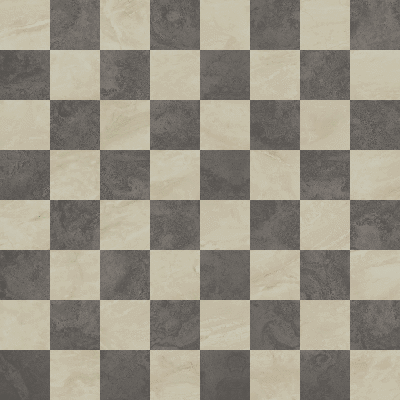

In [ ]:
choice(boards)

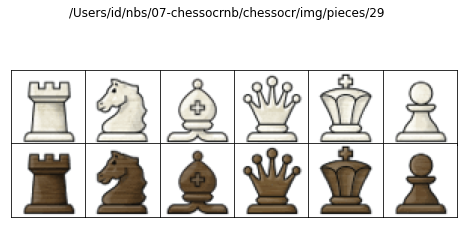

In [ ]:
choice(pieces)

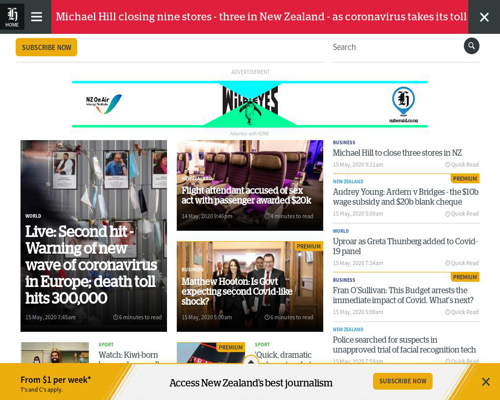

In [ ]:
Image.open(choice(sites)).resize((500, 400))

In [ ]:
dirs={}
board_out = Path.home()/".fastai/data/chess"
dirs["board"]=FileNamer(board_out)
basepath = Path.home() / ".fastai/data/chesspiece/"

for piece, key in zip(['rook', 'knight', 'bishop', 'queen', 'king', 'pawn', 'blank'], 
                      ['r', 'n', 'b', 'q', 'k', 'p', '_']):
    path = basepath / piece
    Path.mkdir(path, parents=True, exist_ok=True)
    dirs[key] = FileNamer(path)

In [ ]:
l = []
for i in range(10):
    board = choice(boards)
    board.reset() # fix this
    r = Render(board, choice(pieces), choice(fens), (choice(sites)), dirs)
    r.save()
    r.save_slices()
    l.append(r)